In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Permute,Dense,Flatten,Conv2D,Resizing,Rescaling,Input,Dropout,InputLayer,MaxPool2D,BatchNormalization,RandomContrast,RandomFlip,RandomRotation,MaxPooling2D,Activation,GlobalAveragePooling2D,Add,Embedding,LayerNormalization,MultiHeadAttention
from tensorflow.keras.regularizers import L2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [69]:
TRAIN_DIR = r"C:\Users\KIIT0001\Desktop\emotion detection\images\train"
TEST_DIR = r"C:\Users\KIIT0001\Desktop\emotion detection\images\test"

In [70]:
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [71]:
train=pd.DataFrame()
train['image'],train['label']=createdataframe(TRAIN_DIR)
print(train)
test=pd.DataFrame()
test['image'],test['label']=createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                   image     label
0      C:\Users\KIIT0001\Desktop\emotion detection\im...     angry
1      C:\Users\KIIT0001\Desktop\emotion detection\im...     angry
2      C:\Users\KIIT0001\Desktop\emotion detection\im...     angry
3      C:\Users\KIIT0001\Desktop\emotion detection\im...     angry
4      C:\Users\KIIT0001\Desktop\emotion detection\im...     angry
...                                                  ...       ...
28816  C:\Users\KIIT0001\Desktop\emotion detection\im...  surprise
28817  C:\Users\KIIT0001\Desktop\emotion detection\im...  surprise
28818  C:\Users\KIIT0001\Desktop\emotion detection\im...  surprise
28819  C:\Users\KIIT0001\Desktop\emotion detection\im...  surprise
28820  C:\Users\KIIT0001\Desktop\emotion detection\im...  surprise

[28821 rows x 2 columns]
angry completed
disgust completed
fear completed
happy

In [72]:
def extract_features(images):
    return np.array([np.array(load_img(image, color_mode="grayscale")) for image in tqdm(images)]).reshape(-1, 48, 48, 1)
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])
x_train = train_features / 255.0
x_test = test_features /255.0

100%|██████████| 7066/7066 [00:43<00:00, 162.38it/s]


In [73]:
le=LabelEncoder()
le.fit(train['label'])
print(train.columns)
print(train.head())

if 'train' in train.columns:
    le.fit(train['train'])
else:
    print("The column 'train' does not exist in the DataFrame.")

Index(['image', 'label'], dtype='object')
                                               image  label
0  C:\Users\KIIT0001\Desktop\emotion detection\im...  angry
1  C:\Users\KIIT0001\Desktop\emotion detection\im...  angry
2  C:\Users\KIIT0001\Desktop\emotion detection\im...  angry
3  C:\Users\KIIT0001\Desktop\emotion detection\im...  angry
4  C:\Users\KIIT0001\Desktop\emotion detection\im...  angry
The column 'train' does not exist in the DataFrame.


In [74]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [75]:
no_of_classes = 7
y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

In [76]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))    

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))    
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\KIIT0001\Desktop\emotion detection\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,420,423 (13.05 MB)

 Trainable params: 3,420,423 (13.05 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,       
                               restore_best_weights=True)  

In [84]:
import random
history=model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test,y_test),callbacks=[early_stopping] )
random.seed(42)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 385ms/step - accuracy: 0.6507 - loss: 0.9304 - val_accuracy: 0.6008 - val_loss: 1.0852
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 96s 426ms/step - accuracy: 0.6581 - loss: 0.9181 - val_accuracy: 0.6035 - val_loss: 1.1143
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 421ms/step - accuracy: 0.6667 - loss: 0.8944 - val_accuracy: 0.6053 - val_loss: 1.0938
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 96s 424ms/step - accuracy: 0.6705 - loss: 0.8685 - val_accuracy: 0.5998 - val_loss: 1.1088
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 422ms/step - accuracy: 0.6866 - loss: 0.8391 - val_accuracy: 0.6056 - val_loss: 1.0987
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 95s 422ms/step - accuracy: 0.6963 - loss: 0.8210 - val_accuracy: 0.6053 - val_loss: 1.0999
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 96s 423ms/step - accuracy: 0.6993 - loss: 0.8124 - val_accuracy: 0.6122 - val_loss: 1.1142
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 97s 430ms/step - accuracy: 0.7077 -

In [87]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")
model.save_weights("emotiondetectorweights.weights.h5")

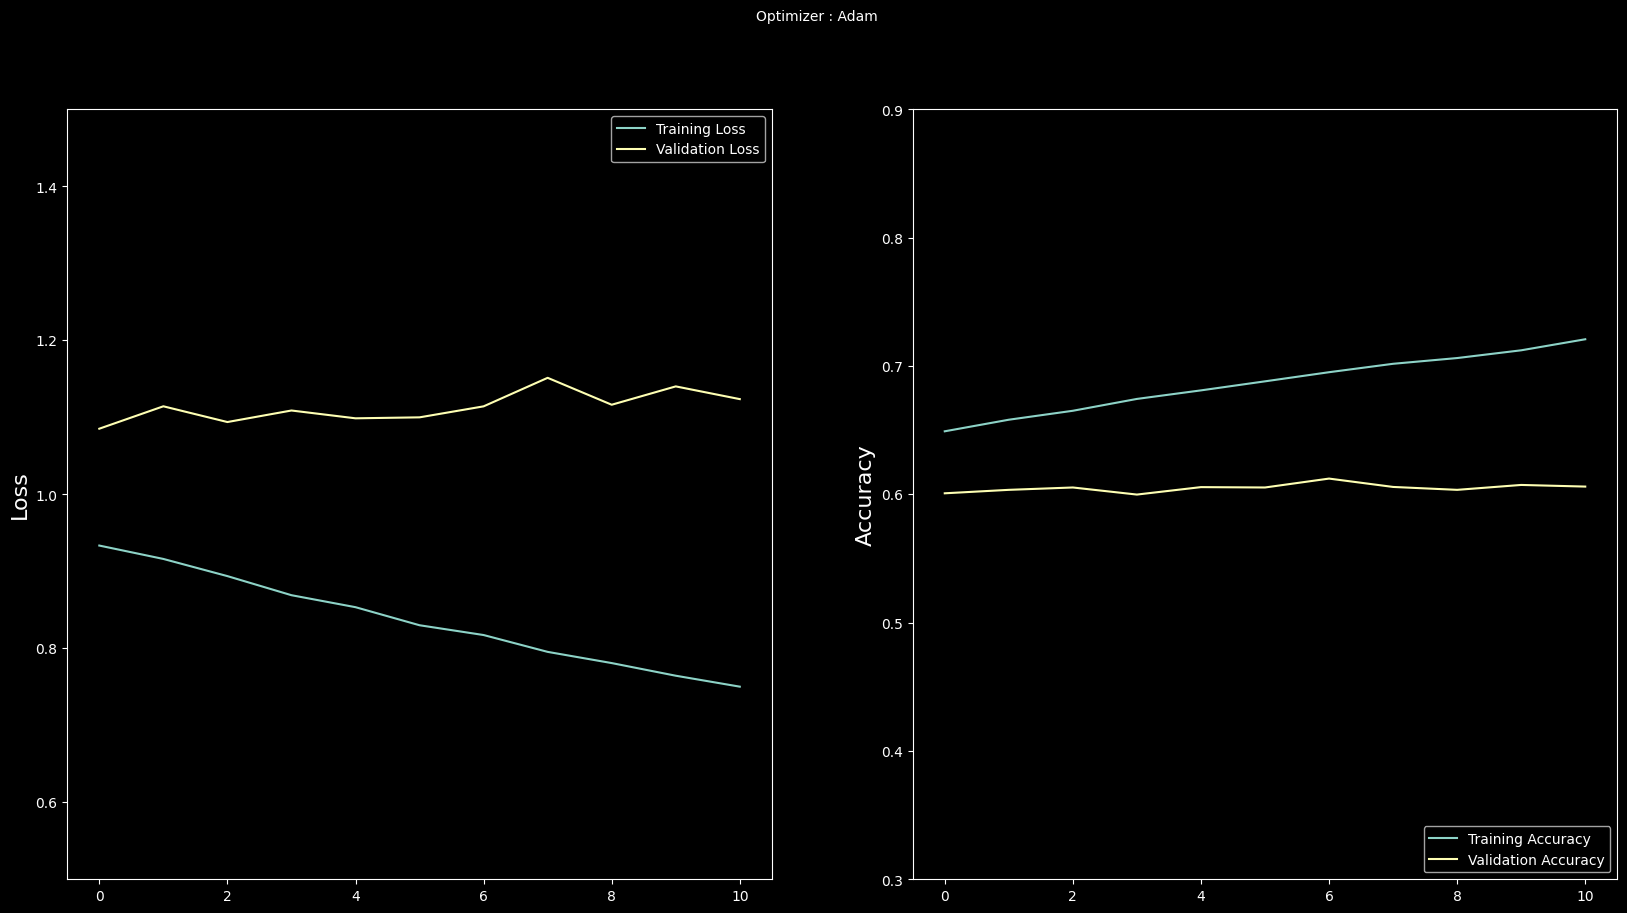

In [88]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)

# Define fixed y-axis range for loss (replace with your desired values)
plt.ylim(0.5, 1.5)  # Adjust these values as needed

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)

# Define fixed y-axis range for accuracy (replace with your desired values)
plt.ylim(0.3, 0.9)  # Adjust these values as needed

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()